In [14]:
import os, time
from dotenv import load_dotenv
import random
import matplotlib.pyplot as plt

from src.agent.gemini import GeminiAgent
from src.agent.constants import PREDEFINED_CLASS
from src.tools import get_image

load_dotenv()

True

In [23]:
GEMINI_API_KEY = os.getenv('GEMINI_API_KEY')
v_agent = GeminiAgent(api_key=GEMINI_API_KEY, 
                      model_name="models/gemini-1.5-flash-001")

## Image Analysis:

**1. Brand Logos:**
- Pepsi
- Lay's
- Poca
- Bivina
- La Vie
- 7 Up

**2. Products:**
- Soft drinks (Pepsi, 7 Up, La Vie, Bivina)
- Beer (Bivina)
- Snacks (Lay's, Poca)
- Canned goods
- Bottled water

**3. Customers:**
- No customers are visible in the image.

**4. Promotional Materials:**
- Lay's promotional banner

**5. Setup Context:**
- Small grocery store or convenience store

## Insights:

**1. Brand Visibility:**
- The image showcases a high level of brand visibility, with multiple brands prominently displayed on shelves and signage.
- Research Focus: Analyze the impact of brand visibility on sales and customer loyalty in this specific context of a small grocery store. 
- Forecasting:  Predict the potential increase in sales for specific brands based on their visibility in the image.
- Application:  Recommend strategies to increase brand visibility for specific products in similar retail environments.

**2. Promotional Compliance:**
- No signs of promotional 

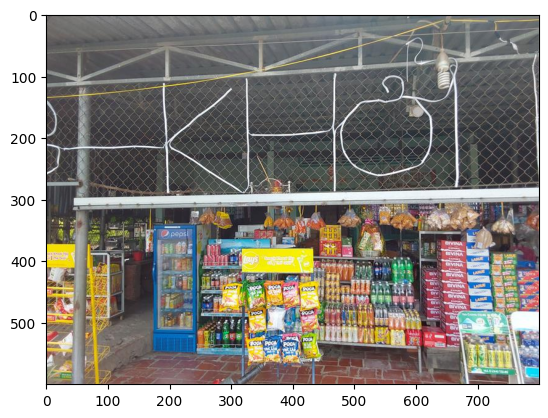

In [27]:
prompt = f"""

From left to right, your task is to detect everything you see in the provided picture. In addition,  Analyze the image information and provide insights based on the criteria given below:

Criteria:
1. Brand Logos: Identify any brand logos mentioned in the description or OCR results.
2. Products: Mention any products such as beer kegs and bottles.
3. Customers: Describe the number of customers, their activities, and emotions.
4. Promotional Materials: Identify any posters, banners, and billboards.
5. Setup Context: Determine the scene context (e.g., bar, restaurant, grocery store, or supermarket).

There are several contexts that you should focus on: 
1. Brand Visibility: If x percentage of the image contains a specific brand’s logo or product visible without obstruction. In detail, Research Focus: Study how brand visibility impacts sales and customer loyalty across different markets and retail environments.
Forecasting: Predict the impact of increased brand visibility on sales and market share. Use image analysis data to forecast the effectiveness of different placement strategies.
Application: Adjust marketing strategies based on predicted increases in customer engagement and sales from improved brand visibility in targeted locations.

2. Promotional Compliance: If promotional materials are present but do not match the latest compliance guidelines (e.g., wrong logo usage, outdated campaign materials). In detail, Research Focus: Analyze historical data on promotions and compliance rates to understand patterns in compliance issues or successes.
Forecasting: Model the potential financial and brand image impacts of non-compliance. Predict the effectiveness of compliance initiatives before full-scale implementation.
Application: Provide compliance teams with predictive insights on potential risk areas for non-compliance and the effectiveness of promotional materials in real-time.

3. Market Penetration: If products are detected in multiple types of retail environments (e.g., bars, supermarkets) across various geographical locations. In detail, Research Focus: Examine market penetration strategies and their successes across different demographics and geographic areas.
Forecasting: Use current data on consumer behavior and historical penetration successes to predict future growth areas. Forecast the potential success of introducing products to new markets or retail formats.
Application: Guide expansion strategies with data-driven insights into which markets or product categories are likely to be receptive to new or expanded product lines.
4. Consumer Engagement: If consumers are detected interacting with the product (e.g., holding, examining, or consuming the product) in the imagery. In detail, Research Focus: Investigate what factors lead to higher consumer engagement at the point of sale. Study the impact of different types of marketing materials on consumer behavior.
Forecasting: Predict consumer behavior changes based on engagement levels observed through image data analysis. Model scenarios to determine how different store layouts, product placements, and interactive promotions affect consumer engagement.
Application: Optimize in-store marketing strategies and promotions to enhance consumer interaction based on predictive models that identify the most effective engagement techniques.

Answers: 
"""

sample = os.path.join("./samples", random.choice(os.listdir('./samples')))
sample = get_image(sample)
response = v_agent.chat(prompt=prompt, 
                    image=sample)
plt.imshow(sample)
print(response.text)
print("====="*5)


In [3]:
import google.generativeai as genai
from google.generativeai.types import HarmCategory, HarmBlockThreshold
from src.agent.constants import DEFAULT_CANDIDATE_COUNT, DEFAULT_NUM_OUTPUTS, DEFAULT_TEMPERATURE, DEFAULT_TOP_K, DEFAULT_TOP_P

_generation_config = {
    "candidate_count": DEFAULT_CANDIDATE_COUNT, 
    "max_output_tokens": DEFAULT_NUM_OUTPUTS, 
    "temperature": DEFAULT_TEMPERATURE, 
    "top_k": DEFAULT_TOP_K, 
    "top_p": DEFAULT_TOP_P, 
}

# https://ai.google.dev/api/python/google/generativeai/protos/HarmCategory
_safety_setting = {
        HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_LOW_AND_ABOVE,
        HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_LOW_AND_ABOVE,
        HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE
}

genai.configure(api_key=GEMINI_API_KEY)
llm = genai.GenerativeModel(
            model_name="gemini-1.5-flash",
            generation_config=_generation_config,
            safety_settings=_safety_setting,
        )

In [ ]:
prompt = """
Generate for me a persona of a marketer who is 
"""